找到最優解: 1447 ,迭代次數： 1
找到最優解: 1454 ,迭代次數： 2
找到最優解: 1454 ,迭代次數： 3
找到最優解: 1454 ,迭代次數： 4
找到最優解: 1454 ,迭代次數： 5
找到最優解: 1454 ,迭代次數： 6
找到最優解: 1454 ,迭代次數： 7
找到最優解: 1454 ,迭代次數： 8
找到最優解: 1454 ,迭代次數： 9
找到最優解: 1454 ,迭代次數： 10
找到最優解: 1454 ,迭代次數： 11
找到最優解: 1458 ,迭代次數： 12
找到最優解: 1458 ,迭代次數： 13
找到最優解: 1458 ,迭代次數： 14
找到最優解: 1458 ,迭代次數： 15
找到最優解: 1458 ,迭代次數： 16
找到最優解: 1458 ,迭代次數： 17
找到最優解: 1458 ,迭代次數： 18
找到最優解: 1458 ,迭代次數： 19
找到最優解: 1458 ,迭代次數： 20
找到最優解: 1458 ,迭代次數： 21
找到最優解: 1458 ,迭代次數： 22
找到最優解: 1458 ,迭代次數： 23
找到最優解: 1458 ,迭代次數： 24
找到最優解: 1458 ,迭代次數： 25
找到最優解: 1458 ,迭代次數： 26
找到最優解: 1458 ,迭代次數： 27
找到最優解: 1458 ,迭代次數： 28
找到最優解: 1458 ,迭代次數： 29
找到最優解: 1458 ,迭代次數： 30
找到最優解: 1458 ,迭代次數： 31
找到最優解: 1458 ,迭代次數： 32
找到最優解: 1458 ,迭代次數： 33
找到最優解: 1458 ,迭代次數： 34
找到最優解: 1458 ,迭代次數： 35
找到最優解: 1458 ,迭代次數： 36
找到最優解: 1458 ,迭代次數： 37
找到最優解: 1458 ,迭代次數： 38
找到最優解: 1458 ,迭代次數： 39
找到最優解: 1458 ,迭代次數： 40
找到最優解: 1458 ,迭代次數： 41
找到最優解: 1458 ,迭代次數： 42
找到最優解: 1458 ,迭代次數： 43
找到最優解: 1458 ,迭代次數： 44
找到最優解: 1458 ,迭代次數： 45
找到最優解: 1458 ,迭代次數： 

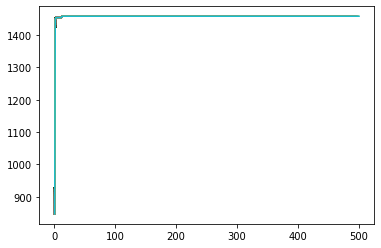

方案为： [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]


In [145]:
import random
import math
global m,C;    # m個物品 ,背包容量C

global best,T,af;   #best 紀錄全局最優  T 温度  af退火率


m=15; T=200.0; af =0.95;

best_way=[0]*m;   now_way=[0]*m  #  best_way 記錄全局最優解方案   now_way 紀錄當前解方案  
weight=[70,73,77,80,82,87,90,94,98,106, #物品重量
                  110,113,115,118,120]; 
value=[135,139,149,150,156,163,173,184, #物品價值
                   192,201,210,214,221,229,240]
 
def cop(a,b,le):     #複製函数 複製b的值
    for i in range(le):
        
        a[i]=b[i]   #複製b的值
def calc(x):  #計算背包價值
    global C,wsum;
    vsum=0;wsum=0;
    for i in range(m):
        vsum +=x[i]*value[i];  wsum += x[i]*weight[i];    
    return  vsum;
def produce():  #初始產生隨機解
    while (1>0):
        for k in range(m):
            if(random.random() < 0.5):  now_way[k]=1;
            else: now_way[k]=0;
        calc(now_way)
        if(wsum <C): break;
    global best;
    best=calc(now_way);
    cop(best_way,now_way,m);
 
def init():   #初始化函数
    global C,best,T;
    C = 750;
    best=-1;
    produce()    #產生初始解
def get(x):      #隨機將背包中已經存在的物品
    while(1>0):
        ob = random.randint(0,m-1);
        if(x[ob]==1): x[ob]=0;break;
def put(x):      #隨機放入背包中不存在的物品
    while(1>0):
        ob = random.randint(0,m-1);
        if(x[ob]==0): x[ob]=1;break;       
def slove():  #迭代函數
    global best,T
    
    test=[0]*m;
    global x ,y
    
    
    now = 0;   #當前背包價值
    for i in range(100):
        
         
        now = calc(now_way);
        cop(test,now_way,m);
        ob = random.randint(0,m-1); #隨機選取某個物品
        if(test[ob]==1): put(test);test[ob]=0;  #在背包則將其拿出，並加入其他物品
        else:   #不在背包中則直接加入或替換掉已在背包中的物品
            if(random.random()<0.5):test[ob]=1; 
            else : get(test); test[ob]=1;
        temp= calc(test);
        if(wsum>C):continue;    # 非法解則跳過
        if(temp > best): best=temp; cop(best_way,test,m);     #更新最優解
        
        if(temp > now): cop(now_way,test,m);       #直接接受新解 
        else:
            g = 1.0*(temp-now)/T;
            if(random.random() < math.exp(g)):   #概率接受劣解
                cop(now_way,test,m);
                
                
    
       
                
#*****************************主函数**********************        
init();
import matplotlib.pyplot as plt
import numpy as np
isGood = 0;
#i = np.linspace(0,1,500)
x = []
y = []
for i in range(1,501):
   
    
    x.append(i)            #將1-500加入x陣列作為x軸
    y.append(best)         #將每次的最佳解加入y陣列作為y軸
   
    plt.plot(x,y)
    slove();
   
    
    T = T*af;    #温度下降
    print('找到最優解:',best,',迭代次數：',i); isGood = 1;
#plt.plot(x,y)    
plt.show()         


  
print('方案为：',best_way);               #打印方案


